# Lab Assignment 3

## Your Name, s1725018

We consider the system $$\frac{dx}{dt}=x(y-1),\quad \frac{dy}{dt}=4-y^2-x^2.$$

In [1]:
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display_latex

## Task 1

The system has the following critical points:

In [2]:
x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")

eq1 = sym.Eq(x(t).diff(t),x(t)*(y(t)-1))
eq2 = sym.Eq(y(t).diff(t),(4-y(t)*y(t)-x(t)*x(t)))

FG = sym.Matrix([eq1.rhs, eq2.rhs])
sym.solve(FG)

## Task 2

Here we use the `linearise` function from Lab 3 to find linear approximations of the system around two of its critical points.

In [3]:
def lin_matrix(equations,coordinates):
    x = sym.Function('x')
    y = sym.Function('y')
    FG = sym.Matrix([equations[0].rhs, equations[1].rhs])
    matJ = FG.jacobian([x(t), y(t)])
    lin_mat = matJ.subs({x(t):coordinates[0], y(t):coordinates[1]})
    return (lin_mat)

def linearise(equations,coordinates):
    u = sym.Function('u')
    v = sym.Function('v')
    lin_mat = lin_matrix(equations,coordinates)
    equ_u_v = lin_mat * sym.Matrix([u(t),v(t)])
    eq1 = sym.Eq(u(t).diff(t),equ_u_v[0])
    eq2 = sym.Eq(u(t).diff(t),equ_u_v[1])
    return [eq1, eq2]

print("Linear approximation for point (0,-2):")
display_latex(linearise([eq1,eq2],[0,-2]))
print("Linear approximation for point (3**0.5,1):")
display_latex(linearise([eq1,eq2],[np.sqrt(3),1]))

Linear approximation for point (0,-2):


Linear approximation for point (3**0.5,1):


## Task 3

Here we produce a phase portrait of the system, with trajectories showing the behaviour around the critical points.

/opt/conda/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


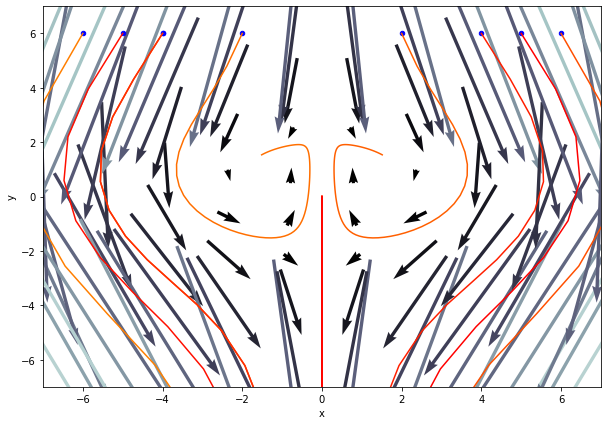

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vField(x,t):
    u = x[0]*(x[1]-1)
    v = 4 - np.square(x[0]) - np.square(x[1])
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-7:7:10j,-7:7:10j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.01, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[-6,6], [-2,6],[2,6], [6,6], [-4,6], [-4, 6], [4, 6], [-5,6], [5, 6]]
durations = [[0,4], [0,4], [0,4], [0,4], [0,4], [0,4], [0,4], [0,4], [0,4]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-7,7)
plt.ylim(-7,7)

plt.show()